In [175]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sklearn
from scipy import ndimage, misc
import math
%matplotlib inline
import cv2
import time
import glob

img_list = []
filenamelist= []
for img in glob.glob("0518ALL_Data/0521_CCD-4_new/*.jpg"):
    #img_list.append(cv2.imread(img,0))
    filenamelist.append(img)
np.array(filenamelist).shape

(246,)

0525_images\CCD-4\19.jpg
Area:  770739.0
Area:  545060.5
1.5
7.0
12.5
359.5
23.0
17.0
20.0
16.0
32.5
23.5
20.0
16.0
3.5
243.5


'\n# canny 參數\nGaussian 7*7|canny 130 210| 45.jpg\nGaussian 9*9|canny 100 210| 2.jpg\nGaussian 7*7|canny 130 200| 3.jpg\nGaussian 7*7|canny(image,80,240,3)|1.jpg\n'

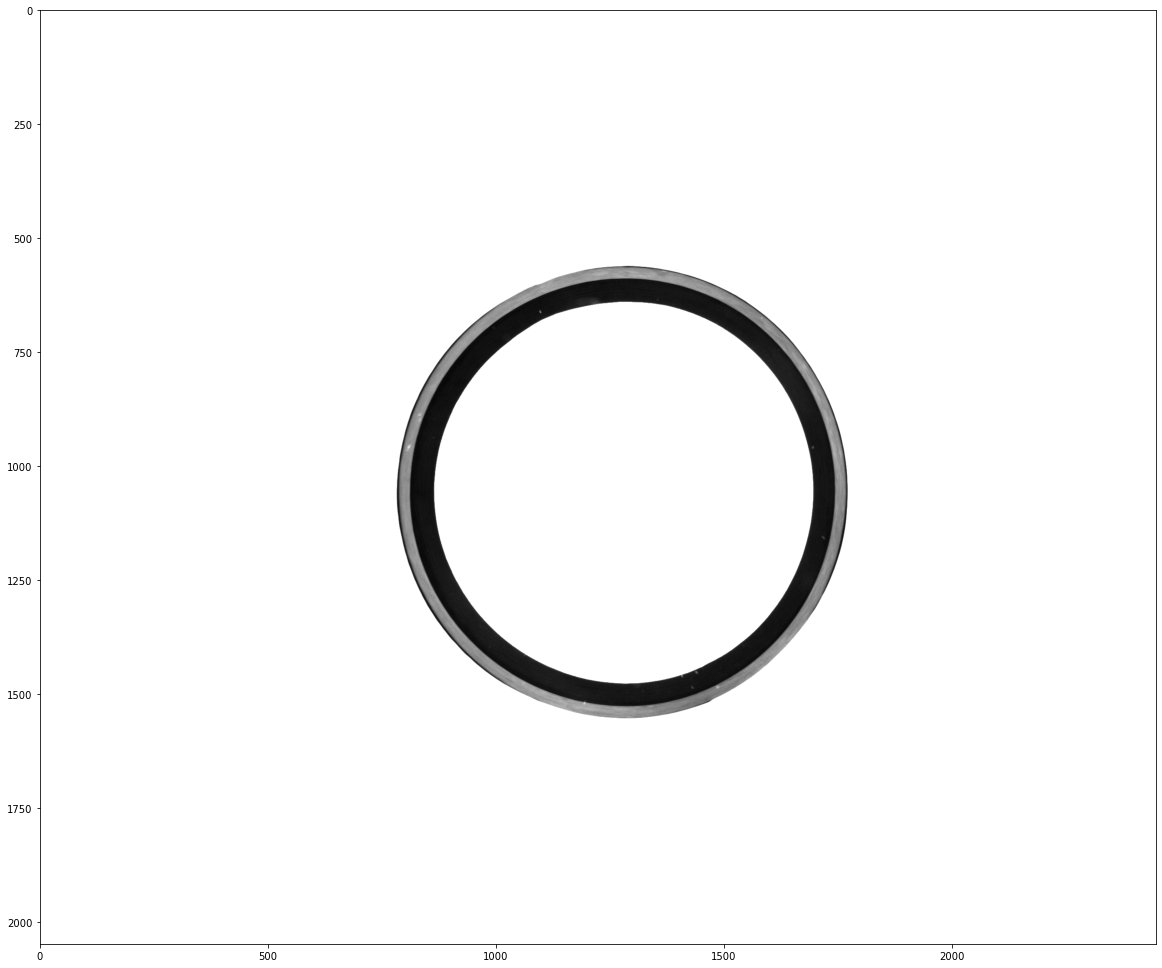

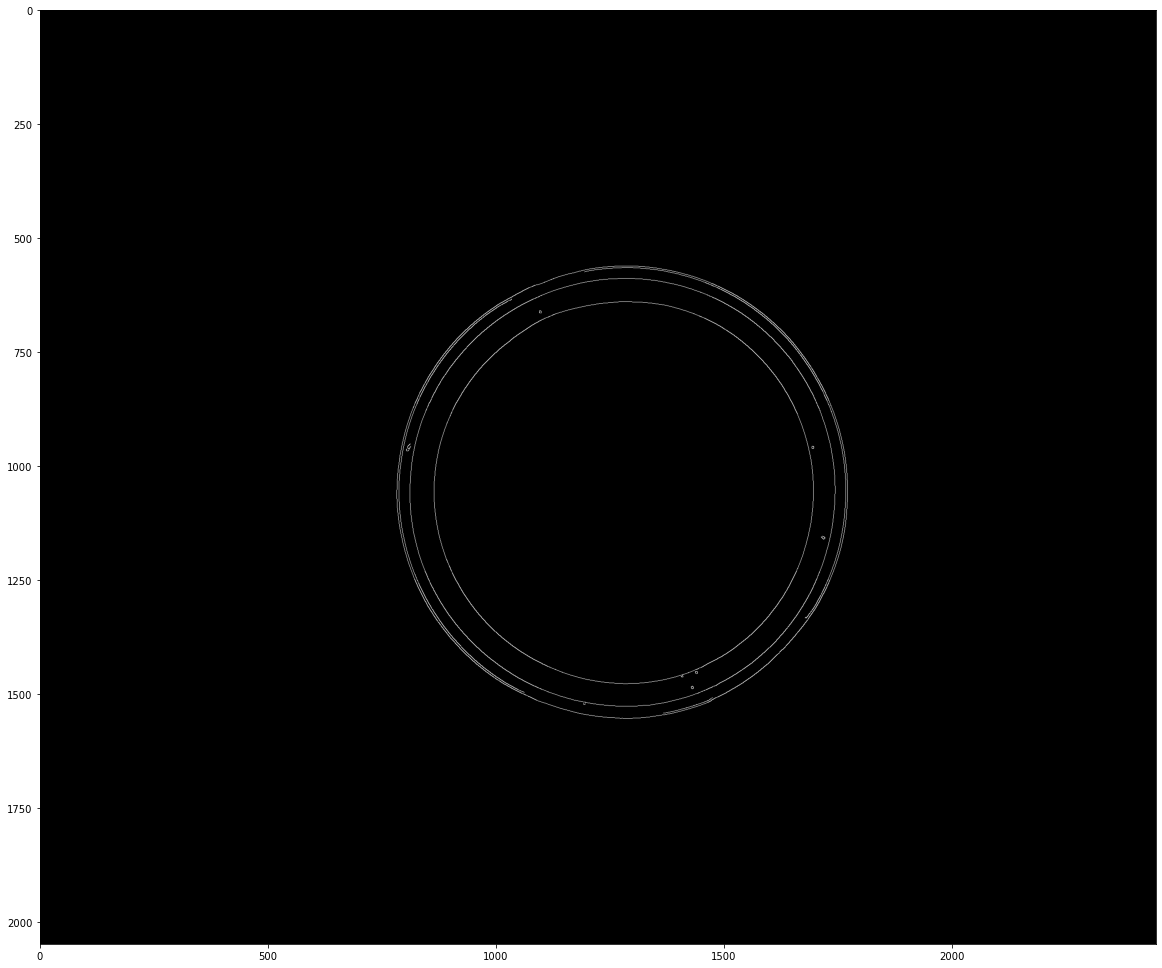

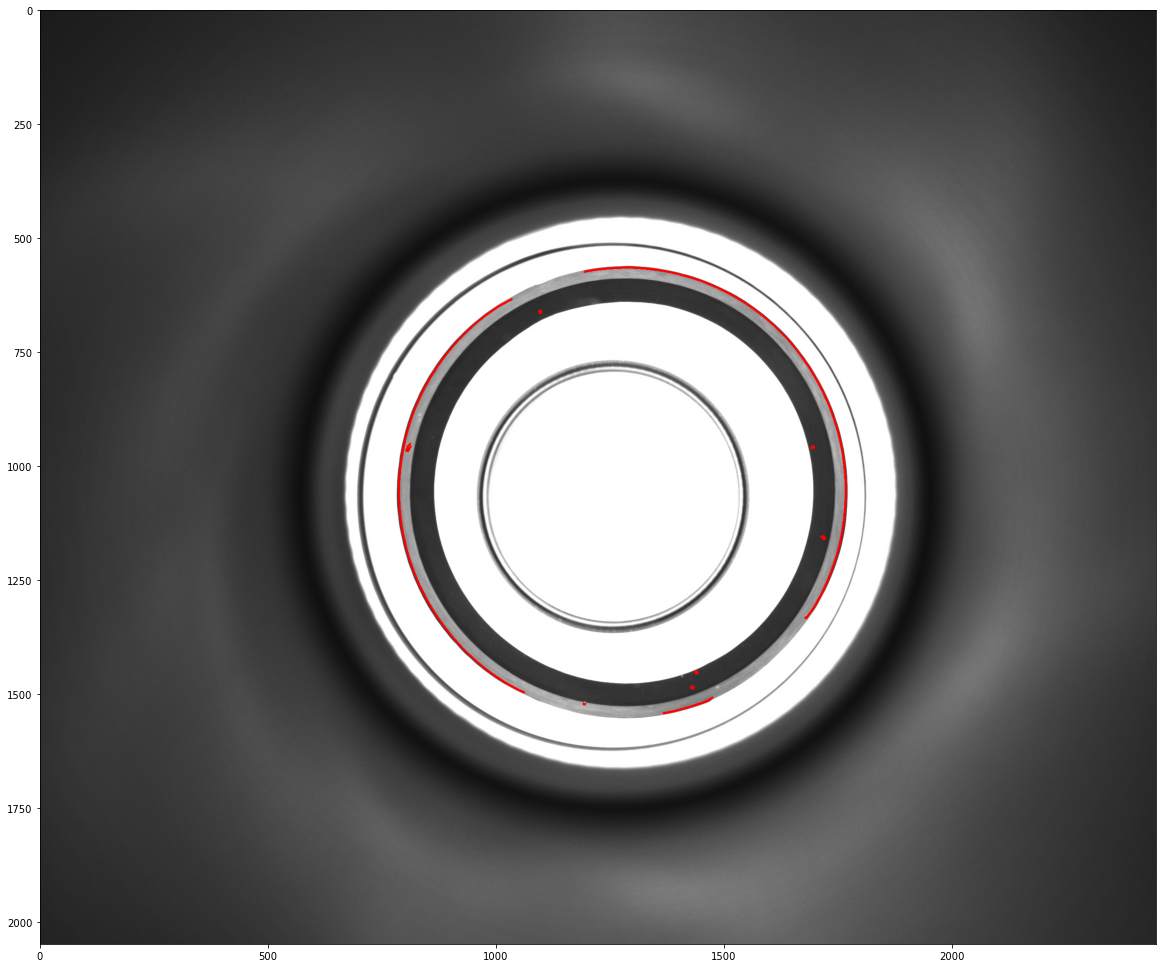

In [325]:
filename = '0525_images\\CCD-4\\19.jpg'
print(filename)
image = np.array(cv2.imread(filename,0))
backtorgb = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)


#=======================以下找出真正的O-ring

ret, thresh1 = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

#plt.figure(figsize=(20,20))
#plt.imshow(thresh1,cmap = 'gray')

#find contours1
_ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


contours_final = []
approx_list = []
for i in range(np.array(contours).shape[0]):
        if(cv2.contourArea(contours[i])>300000 and cv2.contourArea(contours[i])<800000):
            contours_final.append(contours[i])
            #cv2.drawContours(backtorgb,contours[i],-1,(0,0,255),3)

            print("Area: ",cv2.contourArea(contours[i]))
            epsilon = 0.5# * cv2.arcLength(contours[i],True)
            approx = cv2.approxPolyDP(contours[i], epsilon, True)
            approx_list.append(approx)
            #cv2.polylines(backtorgb, [approx], True, (255, 0, 0), 2)
            
                
#plt.figure(figsize=(20,20))
#plt.imshow(backtorgb)

inner_contour_img = np.zeros_like(image)
cv2.drawContours(inner_contour_img, [approx_list[1]],-1,(255,255,255),-1)
inner_contour_img = 1 - inner_contour_img
#outer_contour_img = (outer_contour_img ==255).astype(int)

outer_contour_img = np.zeros_like(image)

cv2.drawContours(outer_contour_img, [approx_list[0]],-1,(255,255,255),-1)
outer_contour_img = 1 - outer_contour_img
#inner_contour_img = (inner_contour_img ==255).astype(int)

# for below delete contour after algorithm
delete_contour_img = np.zeros_like(image)
cv2.drawContours(delete_contour_img, [approx_list[0]],-1,(255,255,255),3)

#outer - inner
oringmask = outer_contour_img- inner_contour_img
#plt.figure(figsize=(20,20))
#plt.imshow(oringmask,cmap = 'gray')

mask_image = oringmask*image
#mask_image = 1 - mask_image
image[oringmask != 1] =255
plt.figure(figsize=(20,20))
plt.imshow(image,cmap = 'gray')


#==============================================用canny找出輪廓=============================================
image = cv2.blur(image,(3,3))
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
image = cv2.filter2D(image, -1, kernel)

image = cv2.GaussianBlur(image,(7,7),0,0)
plt.imsave("stop4_temp.jpg",image,cmap = 'gray')
image = cv2.Canny(image,60,180,3)
plt.figure(figsize=(20,20))
plt.imshow(image,cmap = 'gray')
#==============================================用findcontours把canny得到的 ROI切出來=======================================

_ , contours, hierarchy = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
inner_contours_final = []
approx_list = []
index = []
for i in range(np.array(contours).shape[0]):
    if (hierarchy[0][i][3] >= 0):
        if(cv2.contourArea(contours[i])<500):
            #cv2.drawContours(backtorgb, contours, i, (0, 255, 0), 1, 8);
            #inner_contours_final.append(contours[i])
            epsilon = 0.0000# * cv2.arcLength(contours[i],True)
            index.append(i)
            approx = cv2.approxPolyDP(contours[i], epsilon, True)
            print(cv2.contourArea(approx))
            approx_list.append(approx)
            #print(np.array(approx_list).shape)
            cv2.polylines(backtorgb, [approx], True, (255,0, 0), 3)
            
plt.figure(figsize=(20,20))
plt.imshow(backtorgb)

'''
# canny 參數
Gaussian 7*7|canny 130 210| 45.jpg
Gaussian 9*9|canny 100 210| 2.jpg
Gaussian 7*7|canny 130 200| 3.jpg
Gaussian 7*7|canny(image,80,240,3)|1.jpg
'''

0518ALL_Data/0521_CCD-4_new/27.jpg
Area:  768022.0
Area:  538675.0
Area:  688837.5
Area:  544394.5


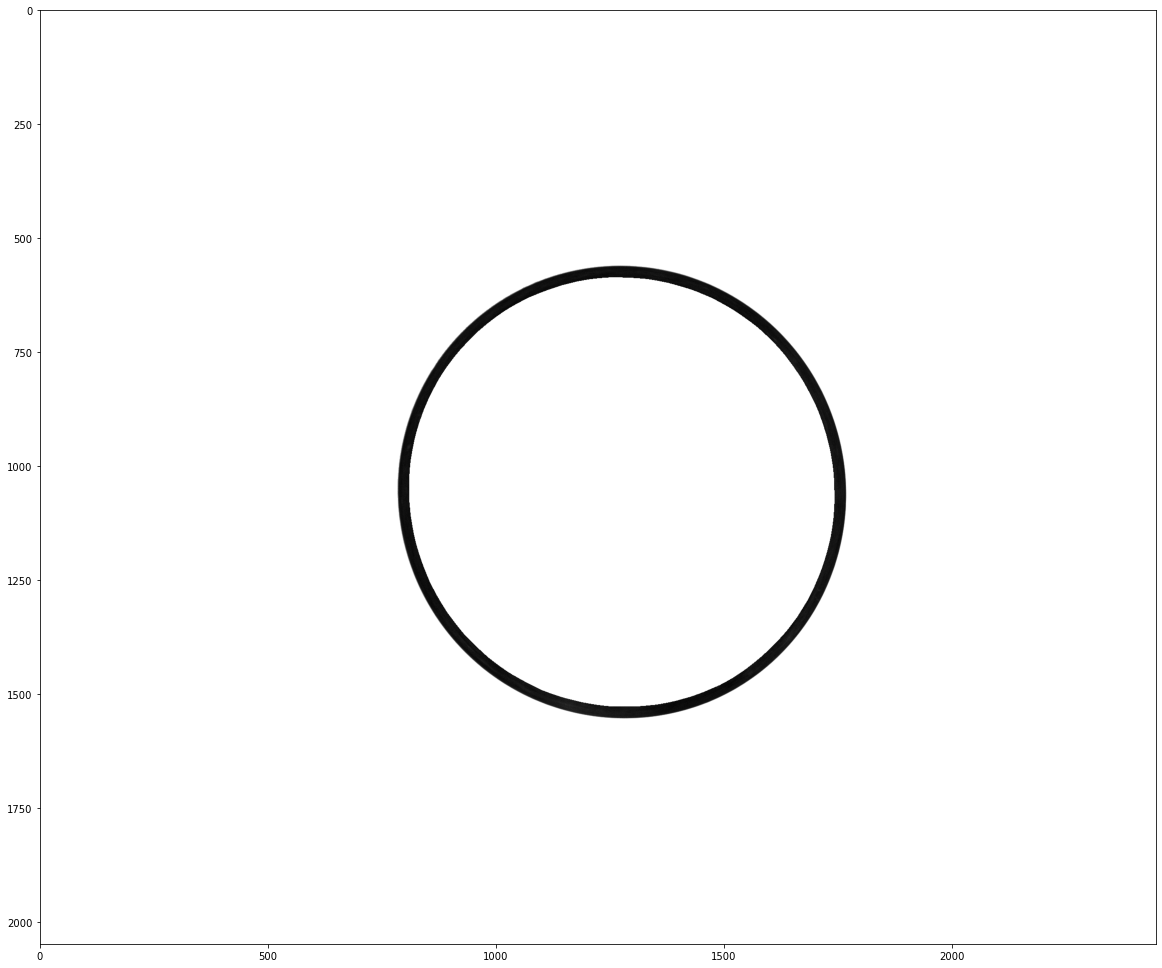

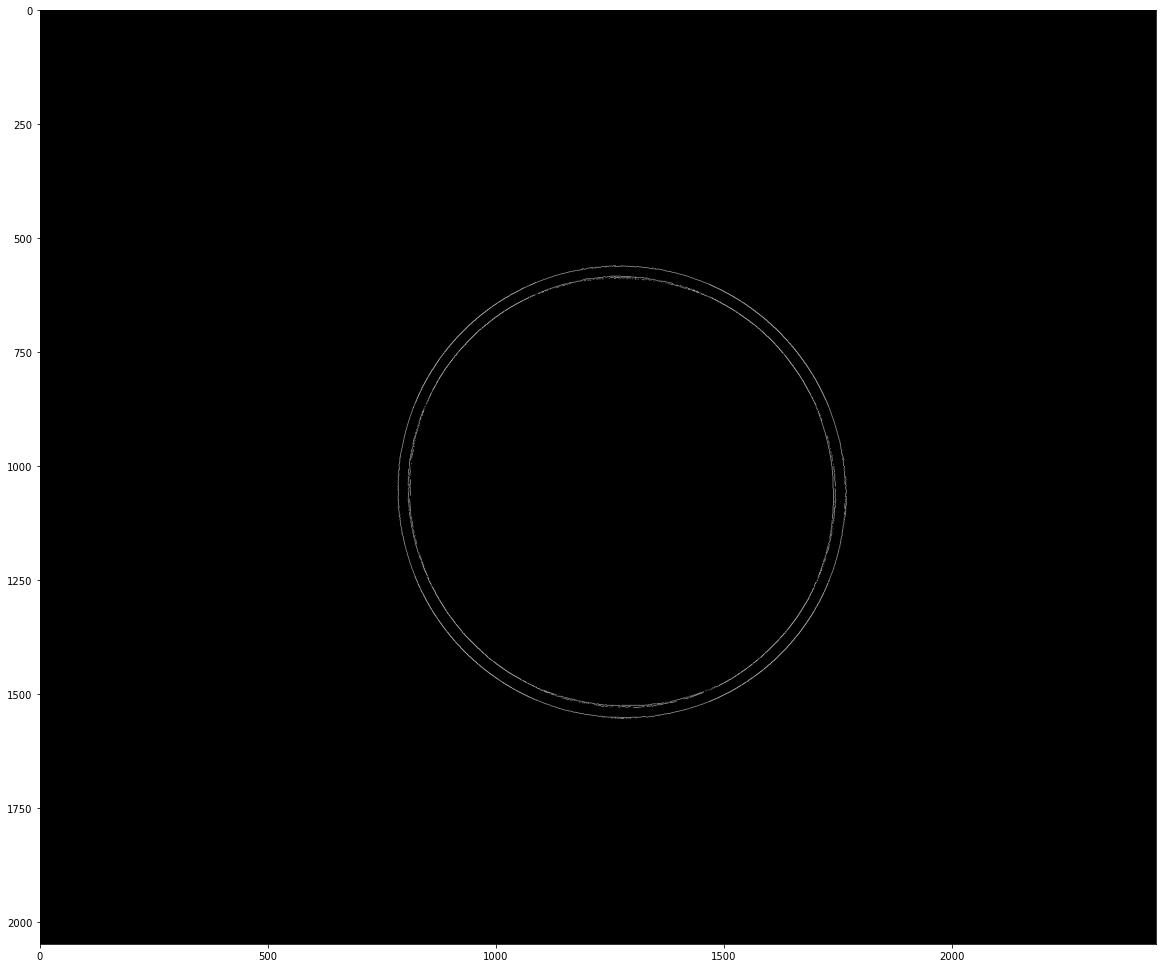

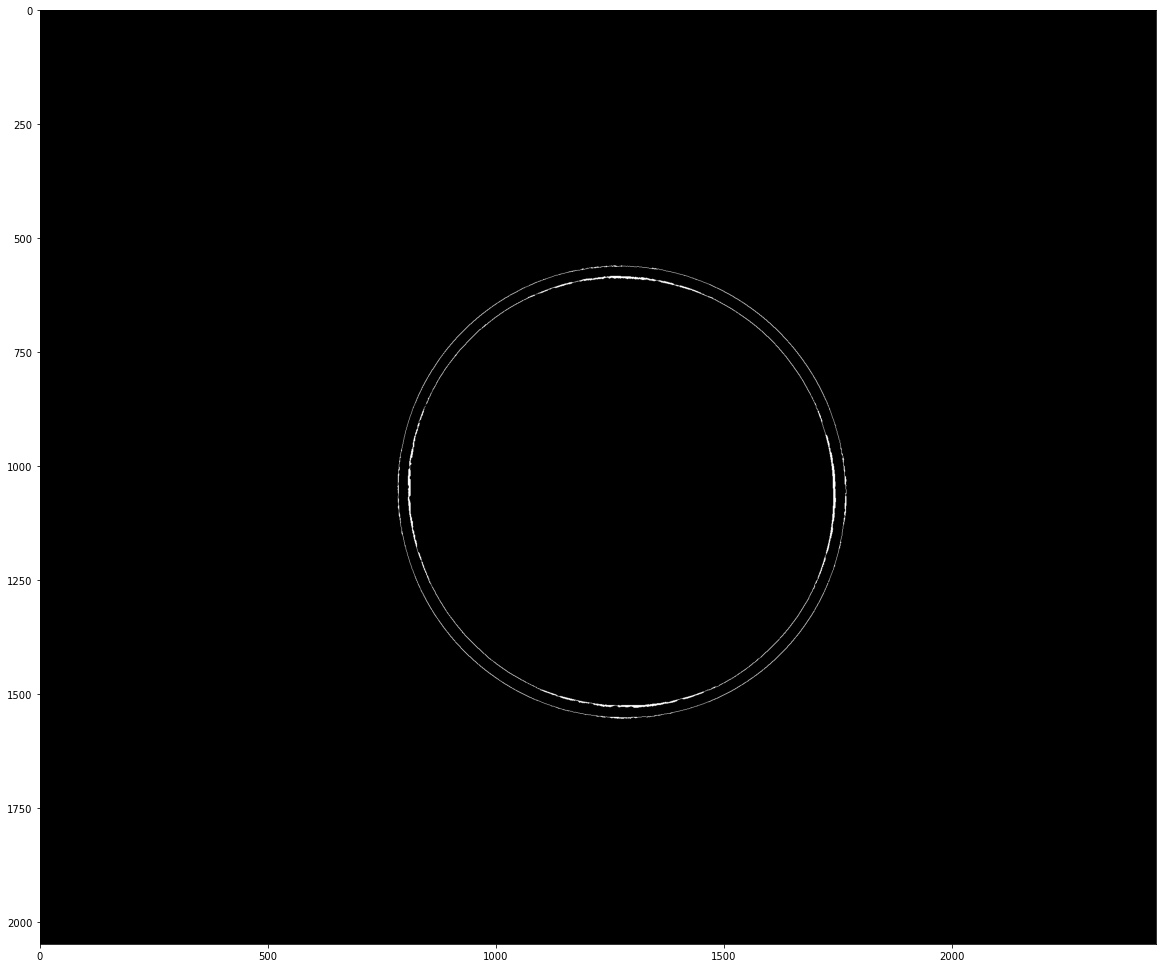

In [174]:

#=======================以上找出真正的O-ring
backtorgb_mask = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)

ret, thresh1 = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY)
#plt.figure(figsize=(20,20))
#plt.imshow(thresh1,cmap = 'gray')

#find contours1
_ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


contours_final = []
approx_list = []
for i in range(np.array(contours).shape[0]):
        if(cv2.contourArea(contours[i])>300000 and cv2.contourArea(contours[i])<800000):
            contours_final.append(contours[i])
            #cv2.drawContours(backtorgb_mask,contours[i],-1,(0,0,255),3)

            print("Area: ",cv2.contourArea(contours[i]))
            epsilon = 0.5# * cv2.arcLength(contours[i],True)
            approx = cv2.convexHull(contours[i], epsilon, True)
            approx_list.append(approx)
            #cv2.polylines(backtorgb_mask, [approx], True, (255, 0, 0), 2)
            
                
#plt.figure(figsize=(20,20))
#plt.imshow(backtorgb_mask)

# 第二小的圓圈裡面都設為0
black_contour_mask = np.zeros_like(image)
cv2.drawContours(black_contour_mask, [approx_list[-2]],-1,(255,255,255),-1)


black_contour_mask = 1 - black_contour_mask
image[black_contour_mask != 1] =255
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#image = cv2.filter2D(image, -1, kernel)

#ret, thresh1 = cv2.threshold(image, 60,1,cv2.THRESH_BINARY)
'''
ret, thresh1 = cv2.threshold(image, 35,1,cv2.THRESH_BINARY)
thresh1 = 1 - thresh1 #toggle
'''
#plt.imsave('s4.jpg',image,cmap = 'gray')

plt.figure(figsize=(20,20))
plt.imshow(image,cmap = 'gray')

#最後把特別暗的地方畫出來(用threshold + opening)
image = cv2.blur(image,(7,7))
#ret, thresh1 = cv2.threshold(image, 25, 1, cv2.THRESH_TRIANGLE+cv2.THRESH_BINARY)

#thresh1 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3, 0)
#thresh1 = cv2.GaussianBlur(thresh1,(5,5),0,0)

#ret, thresh1 = cv2.threshold(image,30, 1,cv2.THRESH_BINARY)
image = cv2.Canny(image,20,28)
#image = thresh1*image
plt.figure(figsize=(20,20))
plt.imshow(image,cmap = 'gray')



close_kernel = np.ones((8,8),np.uint8)
image_close1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, close_kernel)


#close_kernel = np.ones((5,5),np.uint8)
#image = cv2.morphologyEx(image, cv2.MORPH_OPEN, close_kernel)

plt.figure(figsize=(20,20))
plt.imshow(image_close1,cmap ='gray')

#====================================find contour======================================
#cv2.drawContours(delete_contour_img, [approx_list[-2]],-1,(255,255,255),3)
#plt.figure(figsize=(20,20))
#plt.imshow(delete_contour_img,cmap = 'gray')

                
#plt.figure(figsize=(20,20))
#plt.imshow(image_close1 - delete_contour_img,cmap = 'gray')


In [22]:
檢查第一站mask有沒有錯

NameError: name '檢查第一站mask有沒有錯' is not defined